# **Exploratory Data Analysis (EDA)**

## **Initial Data Overview**

In [2]:
import pandas as pd 

### **Loading the Dataset**

In [3]:
wpf = pd.read_csv("/workspaces/Global-Population-Growth-EDA-and-Prediction/data/raw/world_population_growth.csv")

### **Inspecting the Data**

In [4]:
wpf.head(5)

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083


In [5]:
wpf.tail(5)

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
796,Bhavnagar,India,Asia,751493,737128,0.0195
797,Sheffield,United Kingdom,Europe,751303,745876,0.0073
798,Huambo,Angola,Africa,751297,727641,0.0325
799,Ribeirao Preto,Brazil,South America,750174,742115,0.0109
800,Panzhihua,China,Asia,750036,738495,0.0156


### **Checking Data Types and Missing Values**

In [6]:
wpf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               801 non-null    object 
 1   Country            801 non-null    object 
 2   Continent          790 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ KB


### **Summary Statistics**

In [7]:
wpf.describe()

,Population (2024),Population (2023),Growth Rate
count,8.010000e+02,8.010000e+02,801.000000
mean,2.654327e+06,2.604461e+06,0.020051
std,3.723253e+06,3.661201e+06,0.012180
min,7.500360e+05,7.228360e+05,-0.024900
25%,9.909310e+05,9.698040e+05,0.012200
50%,1.379368e+06,1.363510e+06,0.019700
75%,2.570980e+06,2.514077e+06,0.026600
max,3.711504e+07,3.719410e+07,0.058200


## **Visualizing Data**

### **Population Growth Over Time**

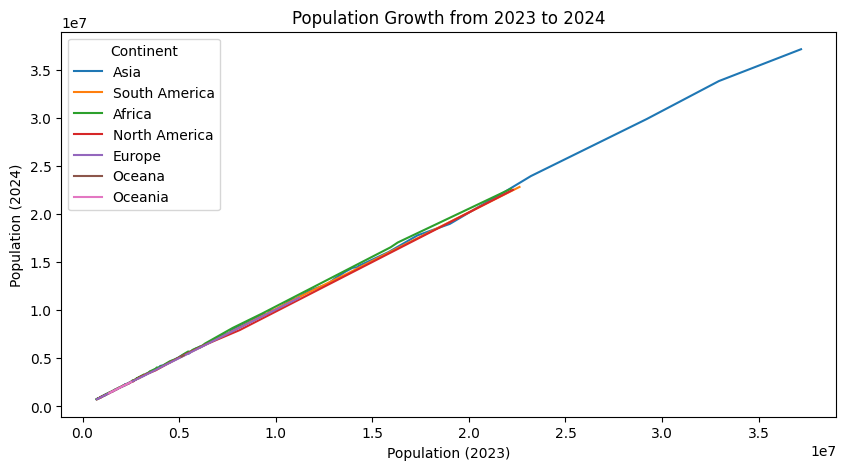

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x="Population (2023)", y="Population (2024)", data=wpf,  hue="Continent")
plt.title("Population Growth from 2023 to 2024")
plt.show()

### **Distribution Of Growth Rate**

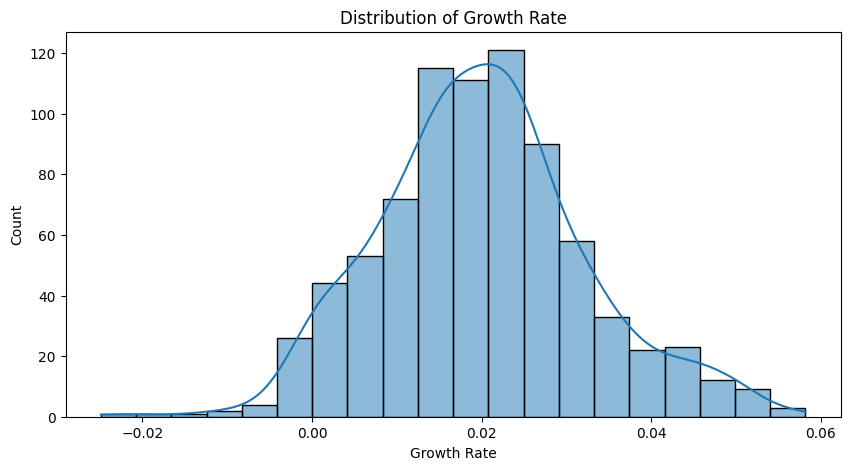

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(wpf['Growth Rate'], bins=20, kde=True)
plt.title('Distribution of Growth Rate')
plt.show()


### **Continent-Wise Population Distribution**

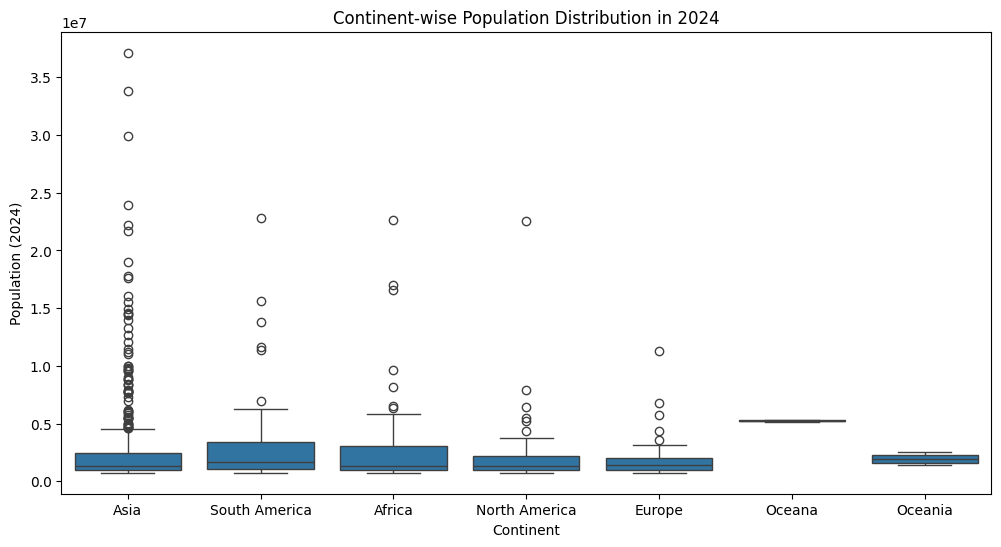

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Population (2024)', data=wpf)
plt.title('Continent-wise Population Distribution in 2024')
plt.show()

## **Correlation Analysis**

### **Correlation Matrix**

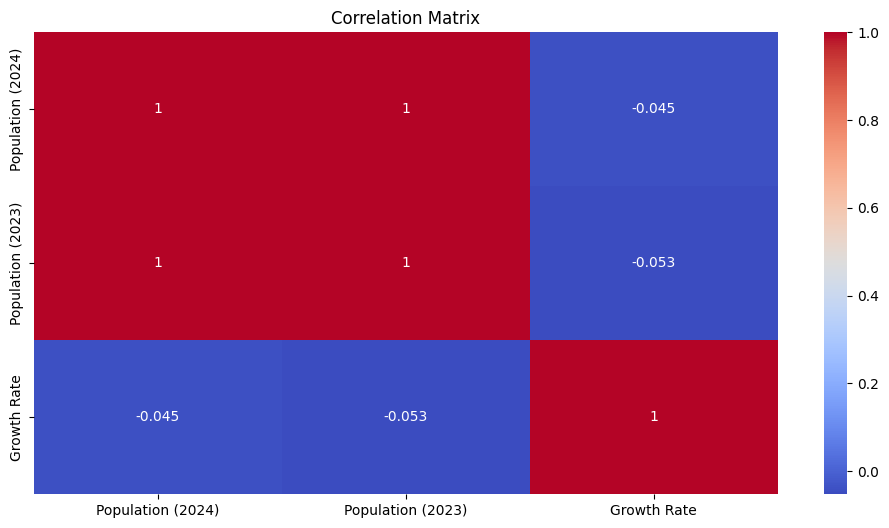

In [11]:
wpf_numerical = wpf.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 6))
sns.heatmap(wpf_numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
from pandas_profiling import ProfileReport

profile = ProfileReport(wpf, title="EDA Report")
profile.to_file("/workspaces/Global-Population-Growth-EDA-and-Prediction/reports/eda_report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 254.31it/s]
